In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
df=pd.read_csv("Advertising.csv")

In [14]:
# Affichage des premières lignes
display(df.head())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
# Vérification des valeurs manquantes
display(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

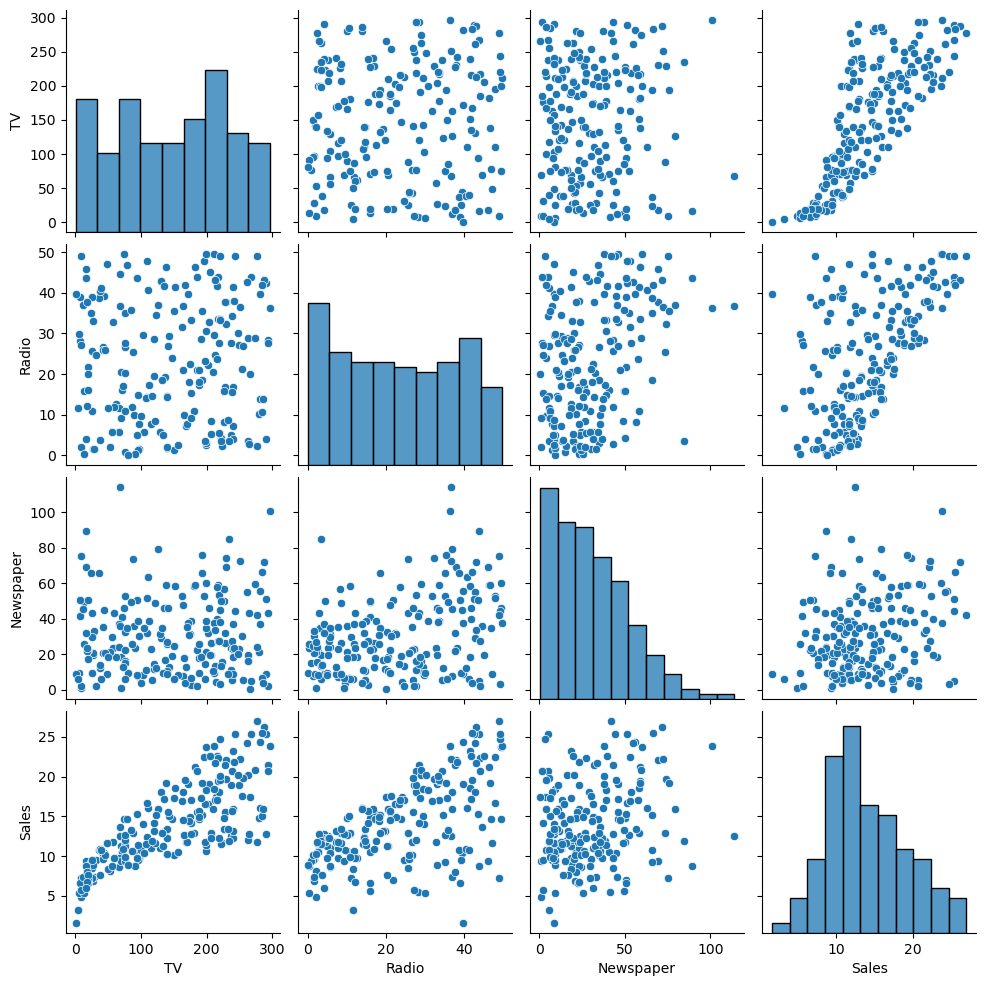

In [16]:
# Visualisation des corrélations
import seaborn as sns
sns.pairplot(df)
plt.show()

In [17]:
# Fonction de normalisation
def normalize(X):
    return (X - np.mean(X)) / np.std(X)

In [18]:
# Implémentation de la descente de gradient "from scratch"
def gradient_descent(X, y, alpha=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(2)  # Initialisation des paramètres
    X_b = np.c_[np.ones((m, 1)), X]  # Ajout du biais
    
    cost_history = []
    for _ in range(epochs):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta -= alpha * gradients
        cost = (1/m) * np.sum((X_b.dot(theta) - y) ** 2)
        cost_history.append(cost)
    
    return theta, cost_history


In [19]:
# Fonction pour entrainer et évaluer un modèle
def train_and_evaluate(feature):
    X = df[feature].values.reshape(-1, 1)
    y = df['Sales'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_norm = normalize(X_train)
    X_test_norm = normalize(X_test)
    
    theta, cost_history = gradient_descent(X_train_norm, y_train)
    
    # Prédictions
    X_test_b = np.c_[np.ones((len(X_test_norm), 1)), X_test_norm]
    y_pred = X_test_b.dot(theta)
    
    # Affichage des résultats
    plt.scatter(X_test, y_test, label='Données réelles')
    plt.plot(X_test, y_pred, color='red', label='Régression')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    
    print(f"Theta pour {feature}: {theta}")
    print(f"Erreur quadratique moyenne: {np.mean((y_pred - y_test)**2)}")


Modèle de régression pour TV


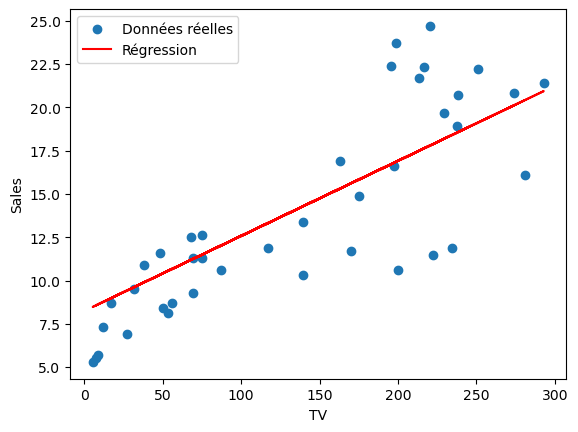

Theta pour TV: [14.09999998  3.91569271]
Erreur quadratique moyenne: 10.604407117804794

Modèle de régression pour Radio


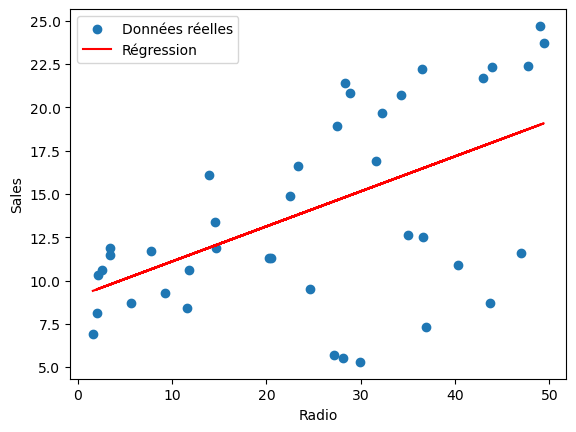

Theta pour Radio: [14.09999998  3.01681561]
Erreur quadratique moyenne: 22.780906245779654

Modèle de régression pour Newspaper


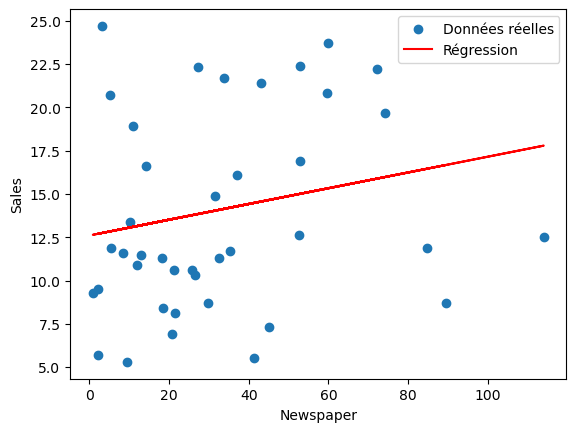

Theta pour Newspaper: [14.09999998  1.21143549]
Erreur quadratique moyenne: 30.289615760660105


In [20]:
# Entrainement des modèles pour chaque feature
for feature in ['TV', 'Radio', 'Newspaper']:
    print(f"\nModèle de régression pour {feature}")
    train_and_evaluate(feature)